In [3]:
pip install transformers datasets torch scikit-learn matplotlib


Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64


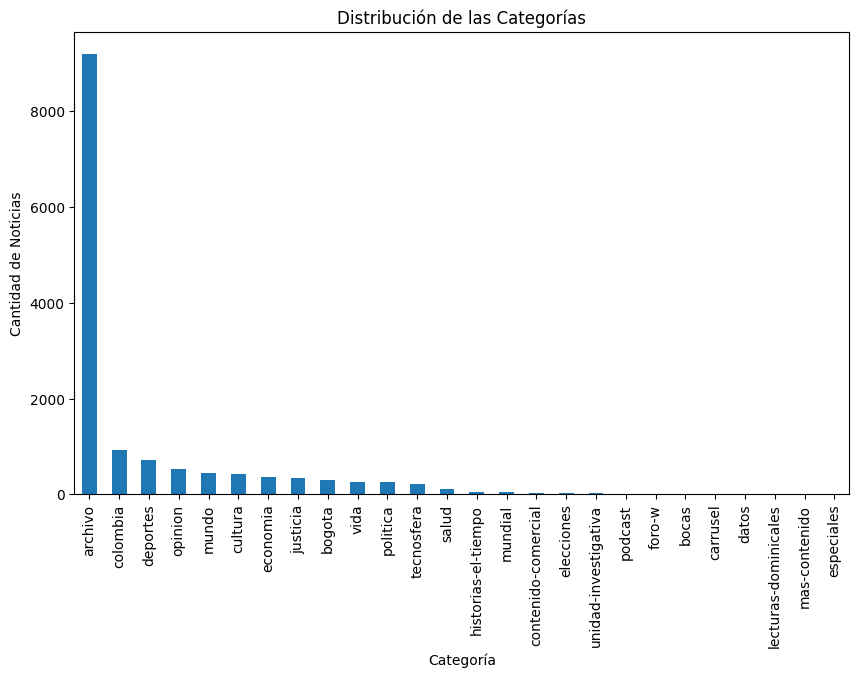

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("Noticias.xlsx")

# Explorar la distribución de las etiquetas
etiqueta_counts = df['Etiqueta'].value_counts()
print(etiqueta_counts)

# Visualizar la distribución
plt.figure(figsize=(10, 6))
etiqueta_counts.plot(kind='bar')
plt.title('Distribución de las Categorías')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

Etiqueta
deportes    727
cultura     430
economia    367
justicia    343
Name: count, dtype: int64


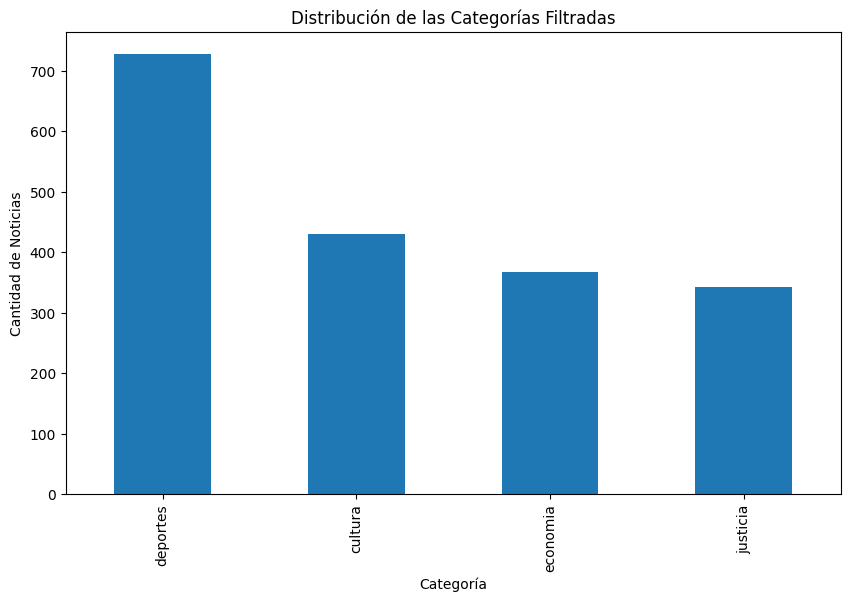

In [5]:
# Definir las categorías relevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']

# Filtrar el DataFrame
df_filtrado = df[df['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías en el DataFrame filtrado
etiqueta_counts_filtrado = df_filtrado['Etiqueta'].value_counts()
print(etiqueta_counts_filtrado)

# Visualizar la distribución (opcional)
plt.figure(figsize=(10, 6))
etiqueta_counts_filtrado.plot(kind='bar')
plt.title('Distribución de las Categorías Filtradas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64


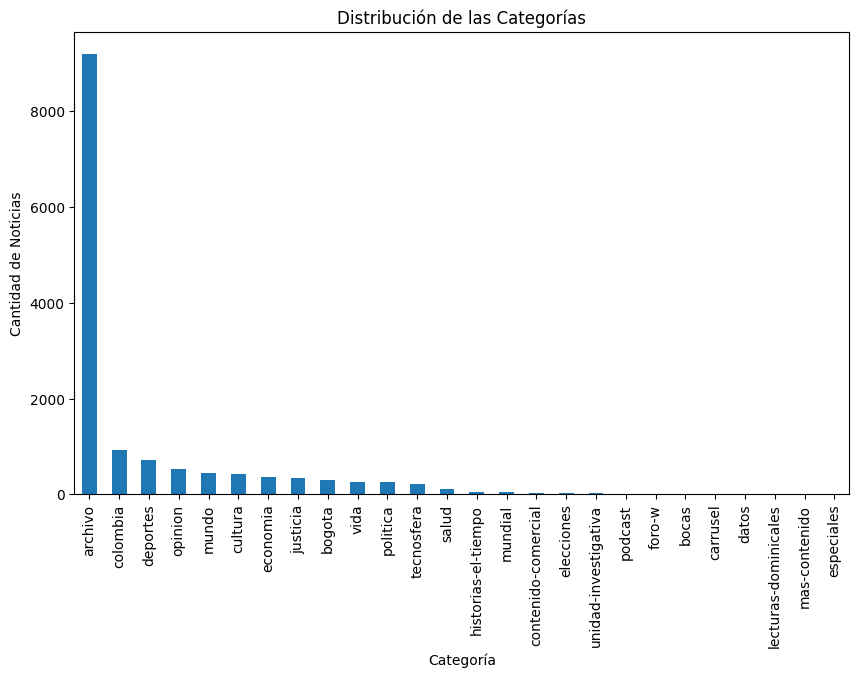

Etiqueta
deportes    727
cultura     430
economia    367
justicia    343
Name: count, dtype: int64


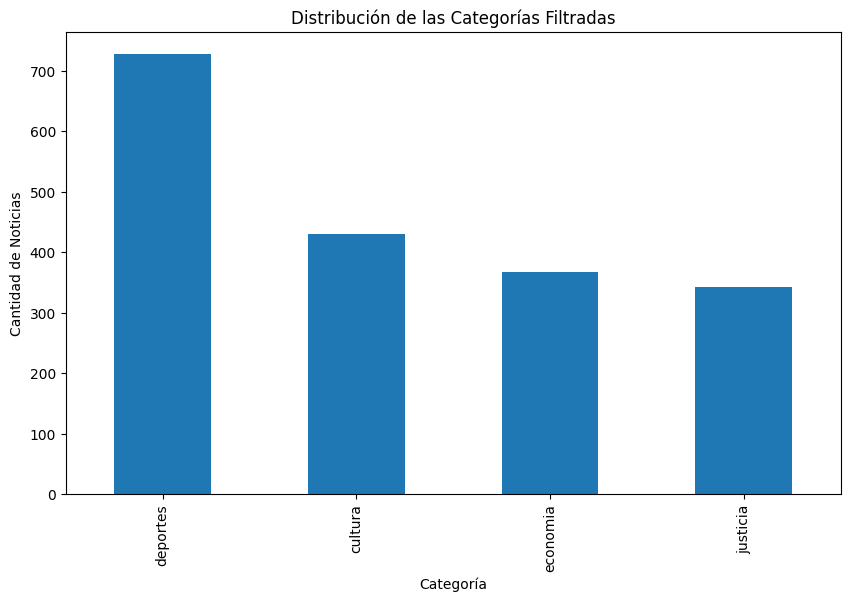

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("Noticias.xlsx")

# Explorar la distribución de las etiquetas
etiqueta_counts = df['Etiqueta'].value_counts()
print(etiqueta_counts)

# Visualizar la distribución
plt.figure(figsize=(10, 6))
etiqueta_counts.plot(kind='bar')
plt.title('Distribución de las Categorías')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

# Definir las categorías relevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']

# Filtrar el DataFrame
df_filtrado = df[df['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías en el DataFrame filtrado
etiqueta_counts_filtrado = df_filtrado['Etiqueta'].value_counts()
print(etiqueta_counts_filtrado)

# Visualizar la distribución (opcional)
plt.figure(figsize=(10, 6))
etiqueta_counts_filtrado.plot(kind='bar')
plt.title('Distribución de las Categorías Filtradas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()


In [9]:
from transformers import BertTokenizer
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Asegurarse de que todos los valores en 'contenido' sean strings
df_filtrado['contenido'] = df_filtrado['contenido'].astype(str)

# Convertir etiquetas a números enteros
label_encoder = LabelEncoder()
df_filtrado['Etiqueta'] = label_encoder.fit_transform(df_filtrado['Etiqueta'])

# Tokenización y padding de las secuencias de texto
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
max_len = 256
df_filtrado['input_ids'] = df_filtrado['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
df_filtrado['input_ids'] = df_filtrado['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(df_filtrado['input_ids'].tolist(), df_filtrado['Etiqueta'].tolist(), test_size=0.2, random_state=42)

# Convertir los datos a tensores
train_encodings = torch.tensor(X_train)
val_encodings = torch.tensor(X_val)
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# Attention masks
train_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_train])
val_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_val])


<ipython-input-9-778dfd931a6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['contenido'] = df_filtrado['contenido'].astype(str)
<ipython-input-9-778dfd931a6e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Etiqueta'] = label_encoder.fit_transform(df_filtrado['Etiqueta'])
Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512). Running this sequence through the model will result in indexing errors
<ipython-input-9-778dfd931

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64


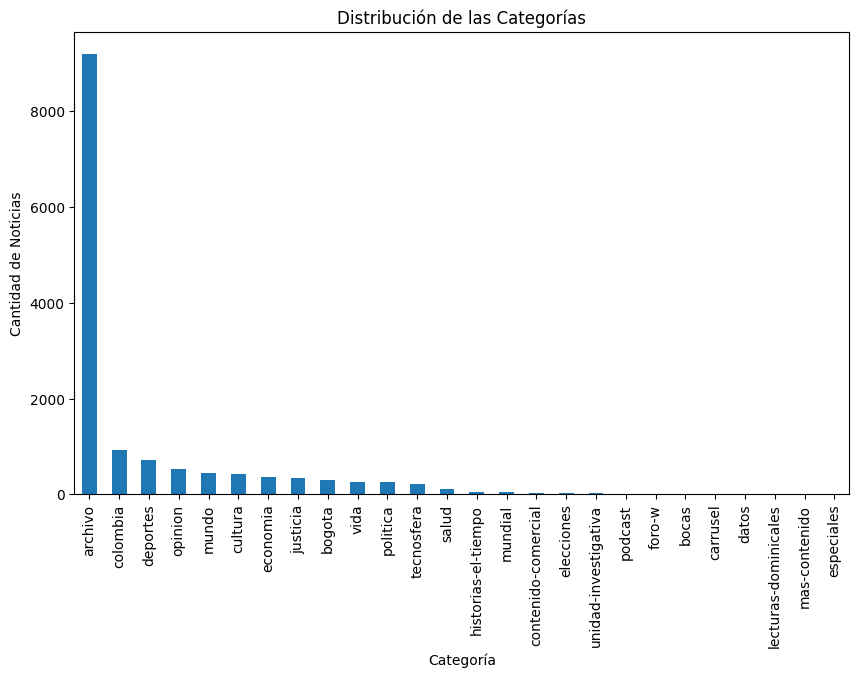

Etiqueta
deportes    727
cultura     430
economia    367
justicia    343
Name: count, dtype: int64


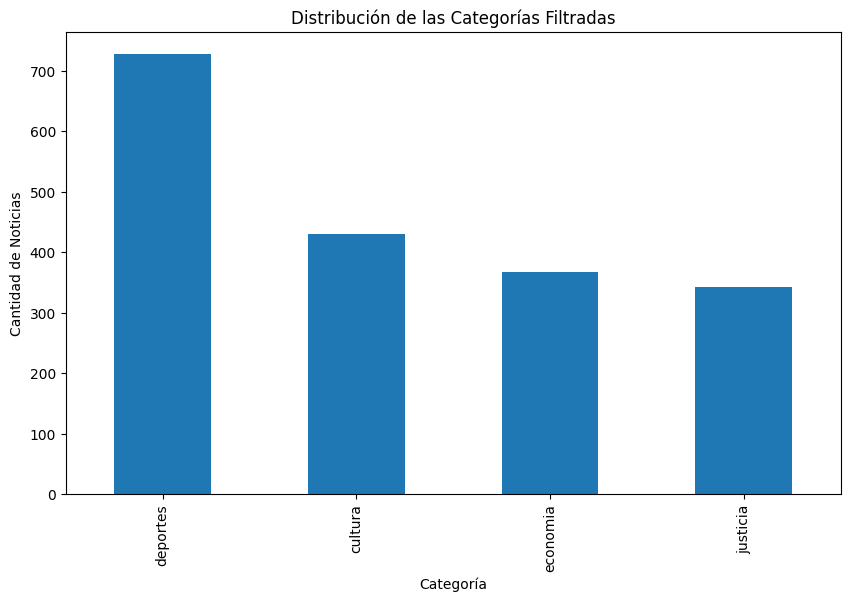

<ipython-input-15-78ea0e83988e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['contenido'] = df_filtrado['contenido'].astype(str)
<ipython-input-15-78ea0e83988e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Etiqueta'] = label_encoder.fit_transform(df_filtrado['Etiqueta'])
Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512). Running this sequence through the model will result in indexing errors
<ipython-input-15-78ea0

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Cargar los datos
df = pd.read_excel("Noticias.xlsx")

# Explorar la distribución de las etiquetas
etiqueta_counts = df['Etiqueta'].value_counts()
print(etiqueta_counts)

# Visualizar la distribución
plt.figure(figsize=(10, 6))
etiqueta_counts.plot(kind='bar')
plt.title('Distribución de las Categorías')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

# Definir las categorías relevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']

# Filtrar el DataFrame
df_filtrado = df[df['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías en el DataFrame filtrado
etiqueta_counts_filtrado = df_filtrado['Etiqueta'].value_counts()
print(etiqueta_counts_filtrado)

# Visualizar la distribución (opcional)
plt.figure(figsize=(10, 6))
etiqueta_counts_filtrado.plot(kind='bar')
plt.title('Distribución de las Categorías Filtradas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()

# Asegurarse de que todos los valores en 'contenido' sean strings
df_filtrado['contenido'] = df_filtrado['contenido'].astype(str)

# Convertir etiquetas a números enteros
label_encoder = LabelEncoder()
df_filtrado['Etiqueta'] = label_encoder.fit_transform(df_filtrado['Etiqueta'])

# Tokenización y padding de las secuencias de texto
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
max_len = 256  # Ajustar el tamaño máximo de secuencia
df_filtrado['input_ids'] = df_filtrado['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
df_filtrado['input_ids'] = df_filtrado['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(df_filtrado['input_ids'].tolist(), df_filtrado['Etiqueta'].tolist(), test_size=0.2, random_state=42)

# Convertir los datos a tensores
train_encodings = torch.tensor(X_train, dtype=torch.long)
val_encodings = torch.tensor(X_val, dtype=torch.long)
train_labels = torch.tensor(y_train, dtype=torch.long)
val_labels = torch.tensor(y_val, dtype=torch.long)

# Attention masks
train_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_train], dtype=torch.float)
val_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_val], dtype=torch.float)


In [18]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Cargar el conjunto de datos
file_path = 'Noticias.xlsx'
data = pd.read_excel(file_path)

# Eliminar las filas con valores faltantes
data.dropna(inplace=True)

# Filtrar noticias con etiquetas válidas
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data = data[data['Etiqueta'].isin(categorias_relevantes)]

# Preprocesar los datos
tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Tokenizar y truncar/pad automáticamente
max_len = 256
tokenized = tokenizer(
    data['contenido'].tolist(),
    padding='max_length',
    truncation=True,
    max_length=max_len,
    return_tensors="pt"
)

data['input_ids'] = tokenized['input_ids'].tolist()
data['attention_mask'] = tokenized['attention_mask'].tolist()

# Convertir las etiquetas a índices numéricos para clasificación multiclase
label_encoder = LabelEncoder()
data['Etiqueta'] = label_encoder.fit_transform(data['Etiqueta'])

num_labels = len(label_encoder.classes_)  # Número de clases

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    data['input_ids'].tolist(),
    data['Etiqueta'].tolist(),
    test_size=0.2,
    random_state=42
)

train_masks, val_masks = train_test_split(
    data['attention_mask'].tolist(),
    test_size=0.2,
    random_state=42
)

# Convertir a tensores
train_encodings = torch.tensor(X_train)
val_encodings = torch.tensor(X_val)
train_labels = torch.tensor(y_train, dtype=torch.long)
val_labels = torch.tensor(y_val, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.float)
val_masks = torch.tensor(val_masks, dtype=torch.float)

# Crear datasets
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings,
    "attention_mask": train_masks,
    "labels": train_labels
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings,
    "attention_mask": val_masks,
    "labels": val_labels
})


In [19]:
# Cargar modelo
model = AutoModelForSequenceClassification.from_pretrained(
    'dccuchile/bert-base-spanish-wwm-cased',
    num_labels=num_labels,
    ignore_mismatched_sizes=True  # Ignorar diferencias en tamaños de la capa de salida
)

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # Donde guardar los resultados
    evaluation_strategy="epoch",     # Evaluación por época
    save_strategy="epoch",           # Guardar por época
    learning_rate=2e-5,              # Tasa de aprendizaje
    per_device_train_batch_size=8,   # Tamaño del batch de entrenamiento
    per_device_eval_batch_size=8,    # Tamaño del batch de evaluación
    num_train_epochs=5,              # Número de épocas
    weight_decay=0.01,               # Decaimiento de peso
    load_best_model_at_end=True,     # Cargar el mejor modelo al final
    report_to="none",                # Desactivar la integración con WandB
)

# Función para calcular métricas
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Inicializar el entrenador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-19-b3d2c266399c>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.190447,0.945055,0.944890,0.945055,0.944919
2,No log,0.195184,0.950549,0.951738,0.950549,0.950651
3,0.168700,0.261936,0.950549,0.951790,0.950549,0.950448
4,0.168700,0.250672,0.956044,0.956232,0.956044,0.956125
5,0.168700,0.261164,0.950549,0.950798,0.950549,0.950626


TrainOutput(global_step=910, training_loss=0.09884994003798936, metrics={'train_runtime': 623.5082, 'train_samples_per_second': 11.676, 'train_steps_per_second': 1.459, 'total_flos': 957741439549440.0, 'train_loss': 0.09884994003798936, 'epoch': 5.0})

In [23]:
def predict_news_category(text, model, tokenizer, label_encoder, max_len=256, device=torch.device('cpu')):
    # Preprocesar el texto
    tokens = tokenizer.encode_plus(
        text,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = tokens['input_ids'].to(device)
    attention_mask = tokens['attention_mask'].to(device)

    # Mover el modelo al dispositivo adecuado
    model.to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    predicted_class = label_encoder.inverse_transform([predicted_class_id])[0]

    return predicted_class

# Definir el dispositivo (CPU o GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Ejemplo de uso
news_article = "Esta noche se jugará el partido más esperado del año en la liga nacional de fútbol."
predicted_category = predict_news_category(news_article, model, tokenizer, label_encoder, device=device)
print(f"Categoría predicha: {predicted_category}")



Categoría predicha: deportes


In [24]:
from sklearn.metrics import classification_report

# Evaluar el modelo en el conjunto de validación
results = trainer.evaluate()
print(results)

# Calcular métricas adicionales en el conjunto de validación
predictions = trainer.predict(val_dataset).predictions
y_pred = predictions.argmax(axis=1)
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


{'eval_loss': 0.19044721126556396, 'eval_accuracy': 0.945054945054945, 'eval_precision': 0.9448898338366535, 'eval_recall': 0.945054945054945, 'eval_f1': 0.9449192398853032, 'eval_runtime': 5.7313, 'eval_samples_per_second': 63.511, 'eval_steps_per_second': 8.026, 'epoch': 5.0}
              precision    recall  f1-score   support

     cultura       0.95      0.92      0.94        79
    deportes       0.98      0.99      0.99       135
    economia       0.91      0.91      0.91        78
    justicia       0.92      0.92      0.92        72

    accuracy                           0.95       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.95      0.94       364



In [25]:
# Ejemplos de noticias para probar
news_articles = [
    "El equipo nacional de fútbol sorprendió anoche al mundo con una victoria inesperada en el campeonato internacional. El delantero estrella marcó el gol decisivo en los últimos minutos del partido, asegurando la victoria con un marcador de 3-2.",
    "La ciudad ha inaugurado el nuevo Museo de Arte Contemporáneo, que alberga una impresionante colección de obras de artistas locales e internacionales. La ceremonia de apertura contó con la presencia de destacadas figuras del mundo del arte y la cultura.",
    "El mercado bursátil registró una subida significativa tras el anuncio del nuevo paquete de estímulo económico por parte del gobierno. Las acciones de las principales empresas tecnológicas vieron un aumento del 5%, reflejando una renovada confianza en la economía.",
    "Las autoridades han desmantelado una red de tráfico de personas en una operación conjunta con la policía internacional. Varios sospechosos fueron arrestados y se espera que enfrenten cargos en los próximos días. La operación es un gran golpe contra el crimen organizado."
]

for article in news_articles:
    predicted_category = predict_news_category(article, model, tokenizer, label_encoder, device=device)
    print(f"Noticia: {article}")
    print(f"Categoría predicha: {predicted_category}\n")


Noticia: El equipo nacional de fútbol sorprendió anoche al mundo con una victoria inesperada en el campeonato internacional. El delantero estrella marcó el gol decisivo en los últimos minutos del partido, asegurando la victoria con un marcador de 3-2.
Categoría predicha: deportes

Noticia: La ciudad ha inaugurado el nuevo Museo de Arte Contemporáneo, que alberga una impresionante colección de obras de artistas locales e internacionales. La ceremonia de apertura contó con la presencia de destacadas figuras del mundo del arte y la cultura.
Categoría predicha: cultura

Noticia: El mercado bursátil registró una subida significativa tras el anuncio del nuevo paquete de estímulo económico por parte del gobierno. Las acciones de las principales empresas tecnológicas vieron un aumento del 5%, reflejando una renovada confianza en la economía.
Categoría predicha: economia

Noticia: Las autoridades han desmantelado una red de tráfico de personas en una operación conjunta con la policía internacio